# IIC-2433 Minería de Datos UC

- Versiones de librerías, python 3.8.10

- numpy 1.20.3
- sklearn 1.0.2


In [1]:
from sklearn import datasets

cancer = datasets.load_breast_cancer()

### Este es un dataset con datos tabulares

In [2]:
print("Features: ", cancer.feature_names)
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [3]:
cancer.data.shape

(569, 30)

### Está desbalanceado (es de clasificación binaria)

In [4]:
print(cancer.target[cancer.target==0].shape[0]/cancer.data.shape[0])
print(cancer.target[cancer.target==1].shape[0]/cancer.data.shape[0])

0.37258347978910367
0.6274165202108963


### vamos a explorar el dataset ajustando un clasificador

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109, stratify=cancer.target)

### Para SVM es fundamenta usar standard scaler, de manera que el hiperplano grueso quede centrado en torno de ambas clases

In [6]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), LinearSVC())
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC())])

Ver parámetros en: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

In [7]:
from sklearn import metrics

y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


### El desempeño es bastante bueno, aún cuando el dataset está desbalanceado

In [8]:
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        64
           1       0.95      0.99      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



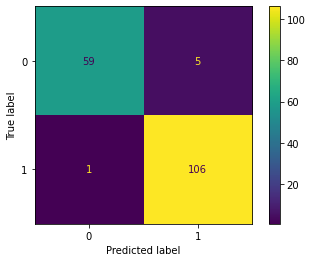

In [9]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm).plot()

### La curva ROC muestra cuantos FP arrastramos al detectar TP. En el ejemplo, Para llegar a un TP 100% pagamos FP = 10% app. 

### La curva es mejor en la medida que sube más rápido. Se suele calcular el área bajo la curva. El valor óptimo es AUC = 1.

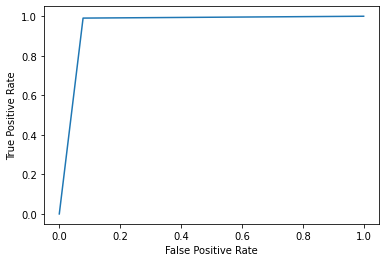

In [11]:
import matplotlib.pyplot as plt

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred, pos_label=clf.classes_[1])
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()